<a href="https://colab.research.google.com/github/shekar2012sri/shekar2012sri/blob/main/final_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

THE START

--- 

---

CUSTOMER SEGMENTATION ON BANKING TRANSACTION DATA.

---

In [1]:
# import modules required for the segmentation
import os
import sys

# libraries for processing, analysis and loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clustering algorithms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler , RobustScaler , StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/bank_transactions.csv")

In [4]:
# check the shape of the df
df.shape

(1048567, 9)

In [5]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### Observation
- The dataset had a total of `1048567` records
- It has a total of 9 columns or attributes in which each is of different data type
- From the above, some columns are seen not to be in their correct data type as they are objects.
- There are columns storing date objects but are not in the date format.
- Some columns seems also be be having some null values.
- The number of nulls are going to be investigated and a proper correction made to deal with them from the cell below.

In [6]:
# sample head
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [7]:
# sample randomly picked
df.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
942056,T942057,C7836259,15/5/85,M,DELHI,28058.21,11/9/16,175742,1499.00
155368,T155369,C1729126,1/5/85,M,CHENNAI,17099.93,3/9/16,150254,245.00
517868,T517869,C7968538,16/6/81,M,DELHI,5960.24,19/8/16,224942,1750.65
608147,T608148,C2430968,14/10/82,M,NEW DELHI,92852.43,26/8/16,190110,500.00
508992,T508993,C6520256,27/10/91,F,CHANDIGARH,10007.59,19/8/16,180410,89.00


In [8]:
# check presence of nulls
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [9]:
# percentage nulls
df.isna().sum()/df.shape[0]

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.003240
CustGender                 0.001049
CustLocation               0.000144
CustAccountBalance         0.002259
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [10]:
# drop all nulls since they account for less than 1% of the total records
# Also for columns like customerAccountBance should not be nulls, the nulls might be unrecorded values
print(f"There are  {df.shape[0]} records before dropping nulls")

# drop them
df.dropna(inplace=True)

print(f"There are  {df.shape[0]} records after dropping nulls")


There are  1048567 records before dropping nulls
There are  1041614 records after dropping nulls


In [11]:
# about 6953 records were dropped

In [12]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### Observation
- From the null analysis, it is observed that null values were present in the following
        CustomerDOB                3397 records with nulls
        CustGender                 1100 records with nulls
        CustLocation                151 records with nulls
        CustAccountBalance         2369 records with nulls

- As the data keeps record of transactions, A record with CustAccountBalance as null is not relevant so it will dropped. Since the null records did not even accumulate over 1% of the whole records, removing them will be an easier way to go. In order to make work easier all nulls are going to be removed.
- After removing all null records, there was 1041614 records which remained.

In [13]:
# check if there is a customer with less than zero balance (Backruptcy)
df[df['CustAccountBalance']<0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [14]:
# check if there is a customer who transacted with negative values, they might be outliers
df[df['TransactionAmount (INR)']<0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [15]:
# check if there is duplicated
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [16]:
# summary starts of numnerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionTime,1041614.0,157122.116378,51263.516076,0.0,124041.00,164247.00,200022.00,2.359590e+05
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


In [17]:
# columns
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [18]:
# drop customer and transaction IDS since there are not of much importance to the task

df.drop(columns=['TransactionID', "CustomerID"], inplace =True)

df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

### Observation
- There no values with negative values for , Customer Balance and Transaction amount since if there are negatives they might be meaning an overdraft.
- The data did not also have duplicated values.
- Columns that stores and are keep to identify a record are not that import in this tasks since the analysis will be generalizing the data.
- TransactionID and customerID columns are going to be removed since they are unique Identifiers.
- On observation on the numerical columns, it is clearly seen that TransactionAmount, accountBalance and Transaction time are very highly skewed this is when the value is observed between the mean and maximum is very big (`Also they have a large std value`)



### EDA PArt

#### 1. How is Gender data distributed from the record


- The record with gender value other F or M is going to be removed since they are the only one documented for in the dataset

In [19]:
# remove T in gender
df = df[~(df['CustGender'] =="T")]

In [20]:
df.CustGender.value_counts(normalize=True, )

M    0.730577
F    0.269423
Name: CustGender, dtype: float64

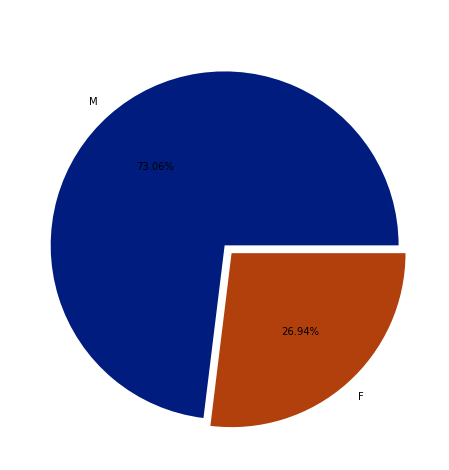

In [21]:
# get the gender data
gender_data = df.CustGender.value_counts(normalize=False, )
#plot the graph of piechart
plt.figure(figsize=(10,8))
plt.pie(
    gender_data.values, labels=gender_data.keys(),
    colors=sns.color_palette("dark"),
    autopct='%.2f%%', explode =(0,0.06)
)
plt.title("Male vs Female distribution comparison", fontsize=19, c='w')
plt.show()

### Results
- There are about 73% of the dataset as Male and 27% as Female. It shows that males transacts more than Females

In [22]:
df.groupby("CustGender").mean()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,1643.958457,159708.341586,109578.913540
M,1537.341185,156168.345152,116997.375472


In [23]:
df.groupby("CustGender").max()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,1380002.88,235957,82244629.9
M,1560034.99,235959,115035495.1


In [24]:
df.groupby("CustGender").min()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,0.0,0,0.0
M,0.0,0,0.0


In [25]:
df.groupby("CustGender").sum()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,4.613523e+08,44819750441,3.075168e+10
M,1.169883e+09,118840674957,8.903243e+10


### Results
- From all analysis above, Males have allways large value transactions than Females
- Example, Males Transacted a sum of 1.16e9 while females had 4.6e8 records transation amount.
- Interms of average amounts, Females had the largest average amount transacted of about 1643 and male 1537 while their male counterparts had the large amount of account balances average i.e M = 116997 while F=109578. This shows that Males keeps more money while Females Transacts more 

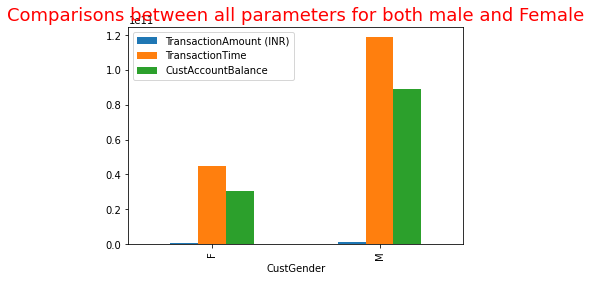

In [26]:

df.groupby("CustGender").sum()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']].plot(kind='bar')
plt.title("Comparisons between all parameters for both male and Female", fontsize=18,c='r')
plt.show()

### Results
- When checking on the 3 main parameters, TransactionAmount was the lost.
- Time taken for transaction in second was way higher than the params
- Customer Acoount balance is higher than  transaction amount hence indicating that the amount being transacted is way lower than amount in their balance. The amount is distribution is low when compaired to stored amount.

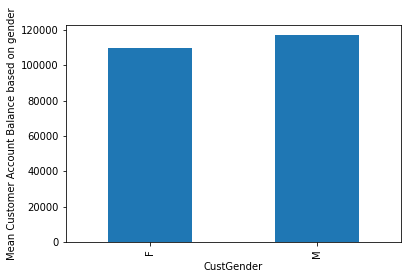

In [27]:
# account balance based on gender
df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind='bar')
plt.ylabel('Mean Customer Account Balance based on gender');

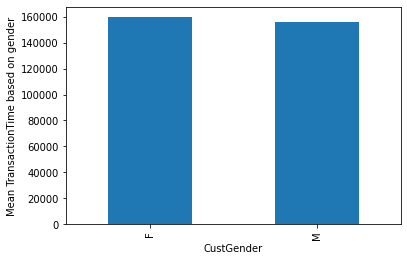

In [28]:
# TransactionTime
df.groupby('CustGender')['TransactionTime'].mean().plot(kind='bar')
plt.ylabel('Mean TransactionTime based on gender');

### Summary
- In summary from the 3 attributes
    - Female took more time for transaction than males.
    - Males have higher account balances than females
    - Females have large transaction amount than males


### Working on Date features

In [29]:
df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [30]:
# columns with date
date_cols =["TransactionDate", "CustomerDOB"]


In [31]:
# date of birth
df.CustomerDOB.value_counts().sort_values(ascending=False)

1/1/1800    56291
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
17/1/59         1
15/4/41         1
4/8/34          1
6/9/71          1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

### Results
- The above shows that 1/1/1800 date of birth as unrealistic since people born at that time might not be alive now (`It is the largest and might have about 222yrs`).
- From the conclusion, the date might be a placeholder
- SInce there is a need to observe them, the records will not be removed

In [32]:
# possibility that the 1800 date is a placeholder. it has the largest number of records.
# It maybe a placehold because there might no people alive of that age who has bank account
# the records cannot be removed since they cover the large part of the dataset

In [33]:
df.TransactionDate.value_counts()

7/8/16      27084
13/8/16     26738
4/9/16      26420
6/8/16      26416
3/9/16      26292
10/9/16     25627
14/8/16     25407
11/9/16     25355
15/8/16     24020
21/8/16     22833
2/9/16      22718
12/8/16     22277
1/9/16      22179
11/8/16     21674
9/8/16      21673
8/9/16      21648
10/8/16     21457
9/9/16      21444
27/8/16     21349
20/8/16     21188
5/9/16      21116
7/9/16      20999
17/8/16     20960
5/8/16      20949
28/8/16     20944
8/8/16      20883
2/8/16      20787
12/9/16     20611
4/8/16      20535
13/9/16     20506
3/8/16      20446
16/8/16     20278
1/8/16      20277
14/9/16     19845
15/9/16     19610
31/8/16     19586
6/9/16      19510
18/8/16     19338
19/8/16     18559
22/8/16     18441
25/8/16     18424
24/8/16     17893
26/8/16     17615
30/8/16     17273
23/8/16     17239
29/8/16     16700
18/9/16     14622
26/9/16     12376
25/9/16      8127
27/9/16      7401
22/9/16      6925
21/10/16     3641
23/9/16      3460
30/9/16      1935
16/10/16        3
Name: Tran

In [34]:
# Transaction seems to be a record spanning in 3 months


### Results.
- The transactions seems to span accross a period of 3 months.
- The month of december has the lowest number of records.

- THe date columns are going to be converted to the required date format.
- This will help in gathering the meta data that can be derrived from them using feature engineering

In [35]:
# convert these columns to datetime
df['CustomerDOB'] =pd.to_datetime(df.CustomerDOB)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [36]:
from datetime import date
date.today()

datetime.date(2023, 1, 2)

In [37]:
# get the possible the age in years of the customer at the time of todata

def get_cust_age(DOB):
    """
    get the year in which the customer was born
    """
    return date.today().year - DOB.year - ((date.today().month, date.today().day) < (DOB.month, DOB.day))

# apply the function and call it Age
df['Age'] = df.CustomerDOB.apply(get_cust_age)

In [38]:
# check ages that are less than 16((Adult age where one can own an account).
# AN assumption is made that those with less than 16 years cannot own an account
df[df.Age >16]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30
...,...,...,...,...,...,...,...,...
1048562,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,32
1048563,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,30
1048564,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,33
1048565,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,44


In [39]:
# There is  about 75020 rows with age that is less than 16.
# The rows with age less than 16 are removed

### Results
- Based on the age columns, Some of the values were negative, it seemed unrealistic since there cannot be a date in future that has already occured.
- All values that are negative were going to be removed
- The records also that had an age less than 18 was removed i.e `It was assumed that in order to create an account, one must be attained the adulthood age since he needs to use his details for account registration so any value less than it are removed.`
- 75020 records were removed


In [40]:
df = df[df.Age>16]
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30


In [41]:
# extract date meta data. They will help in modelling

df['TransMonth'] = df.TransactionDate.dt.month
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransWeekDay'] = df.TransactionDate.dt.dayofweek
df['TransYearDay'] = df.TransactionDate.dt.dayofyear
df['TransYear']  = df.TransactionDate.dt.year

In [42]:
# transaction hour from trasaction time.
from datetime import datetime
df["TransHour"] = [int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]

In [43]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,2,8,0,39,2016,15
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,2,8,0,39,2016,15
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49,2,8,0,39,2016,15
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34,2,8,0,39,2016,2
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30,2,8,0,39,2016,0


### Date Features Analysis.

- Some fetures like month, day and month will be used to do some analysis.
- It will help in gaining insights on when the transactions were made.

In [44]:

# all months
all_months =['Jan',"Feb","March","April","May","June","July","Aug","sept","Oct","Nov","Dec"]
month_df =df.groupby(["TransMonth", "CustGender"]).mean().reset_index()


<Figure size 1080x864 with 0 Axes>

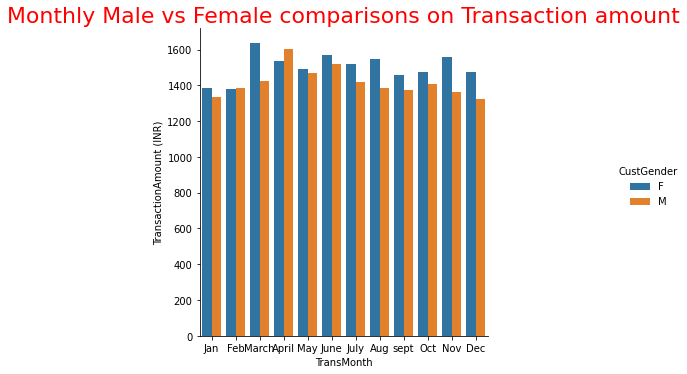

In [45]:
# view the transaction as for each month comparison
plt.figure(figsize=(15,12))
g = sns.catplot(
    data = month_df,
    y='TransactionAmount (INR)',
    kind='bar',
    x="TransMonth",
    hue='CustGender')
plt.title('Monthly Male vs Female comparisons on Transaction amount',fontsize=22,c='r');

g.set_xticklabels(all_months)

### Observation
- Based on individual month transaction amount on total based, unlike for averages, Male customers have higher transaction rate than females.
- Banks should then consider providing more special incentives to males as they are like to be active interms of number of customers.
- August and September had had the most amount of transactions

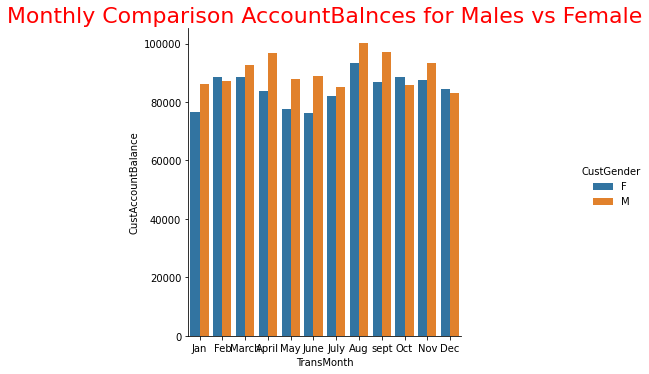

In [46]:

g = sns.catplot(
    data = month_df,
    y='CustAccountBalance',
    kind='bar',
    x="TransMonth",
    hue='CustGender')
plt.title('Monthly Comparison AccountBalnces for Males vs Female',fontsize=22,c='r');

g.set_xticklabels(all_months)

### Res
- Male customers predominantly have greater account balances as compared to their female counterparts. 
- This can be attributed to the fact that their average transaction rates is low as compaired to females. What makes them more interms of TransactionAmount is that they are many unlike females.
- In the month of decembers, Females outweighed males in Amount since maybe on december males tends to give out more money

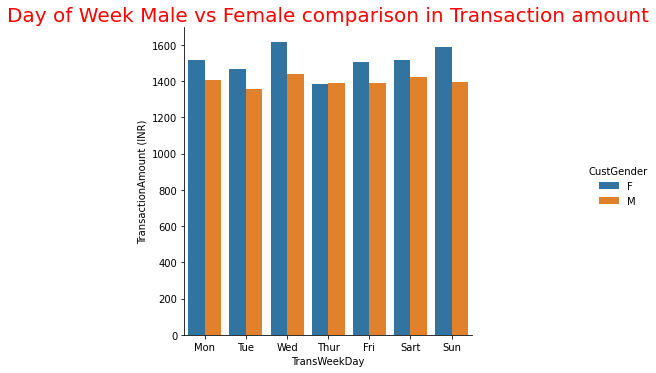

In [47]:

# by week
day_df =df.groupby(["TransWeekDay", "CustGender"]).mean().reset_index()
g = sns.catplot(data=day_df,
            x='TransWeekDay',
            y='TransactionAmount (INR)',
            kind='bar',
            hue='CustGender')
plt.title('Day of Week Male vs Female comparison in Transaction amount',color='r', fontsize=20);
g.set_xticklabels(["Mon", "Tue", "Wed", "Thur","Fri", "Sart", "Sun"])

### Results
- On every date, Females have higher  Transaction amount  than their male counterparts


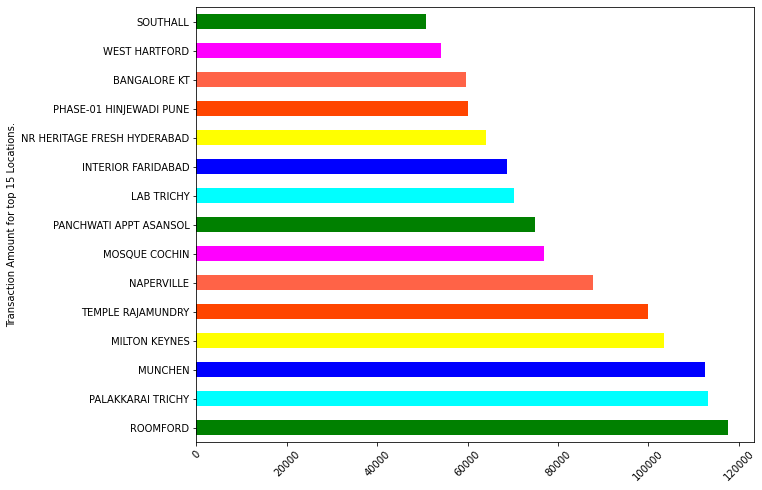

In [48]:
plt.figure(figsize=(10,8))
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(
    ascending=False)[:15].plot(
    kind='barh',
    color=['green','cyan','blue','yellow','orangered','tomato','magenta'])
plt.ylabel('Transaction Amount for top 15 Locations.');
plt.xticks(rotation=45)
plt.show()

### Observation
- Customers from Roomford had the higherst amount of transactions followed by Palakkarai, then Munchen etc 

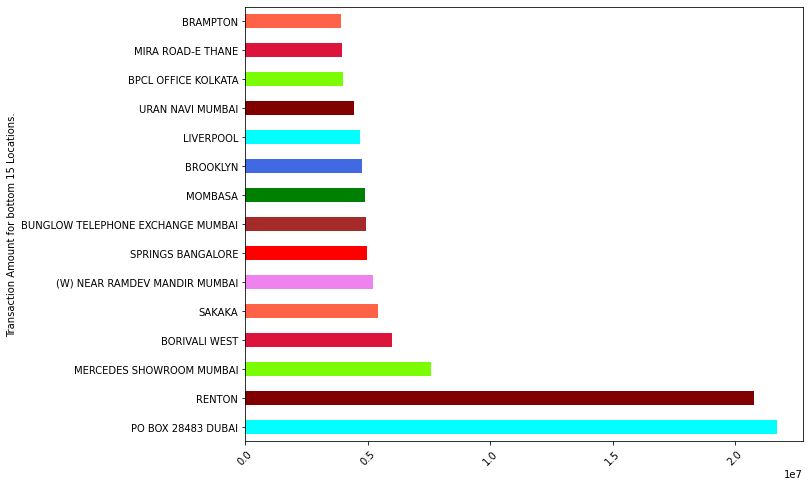

In [49]:
# bottom 10
plt.figure(figsize=(10,8))
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:15].plot(kind='barh',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Transaction Amount for bottom 15 Locations.');
plt.xticks(rotation=45)
plt.show()

### Observing account balance by Age

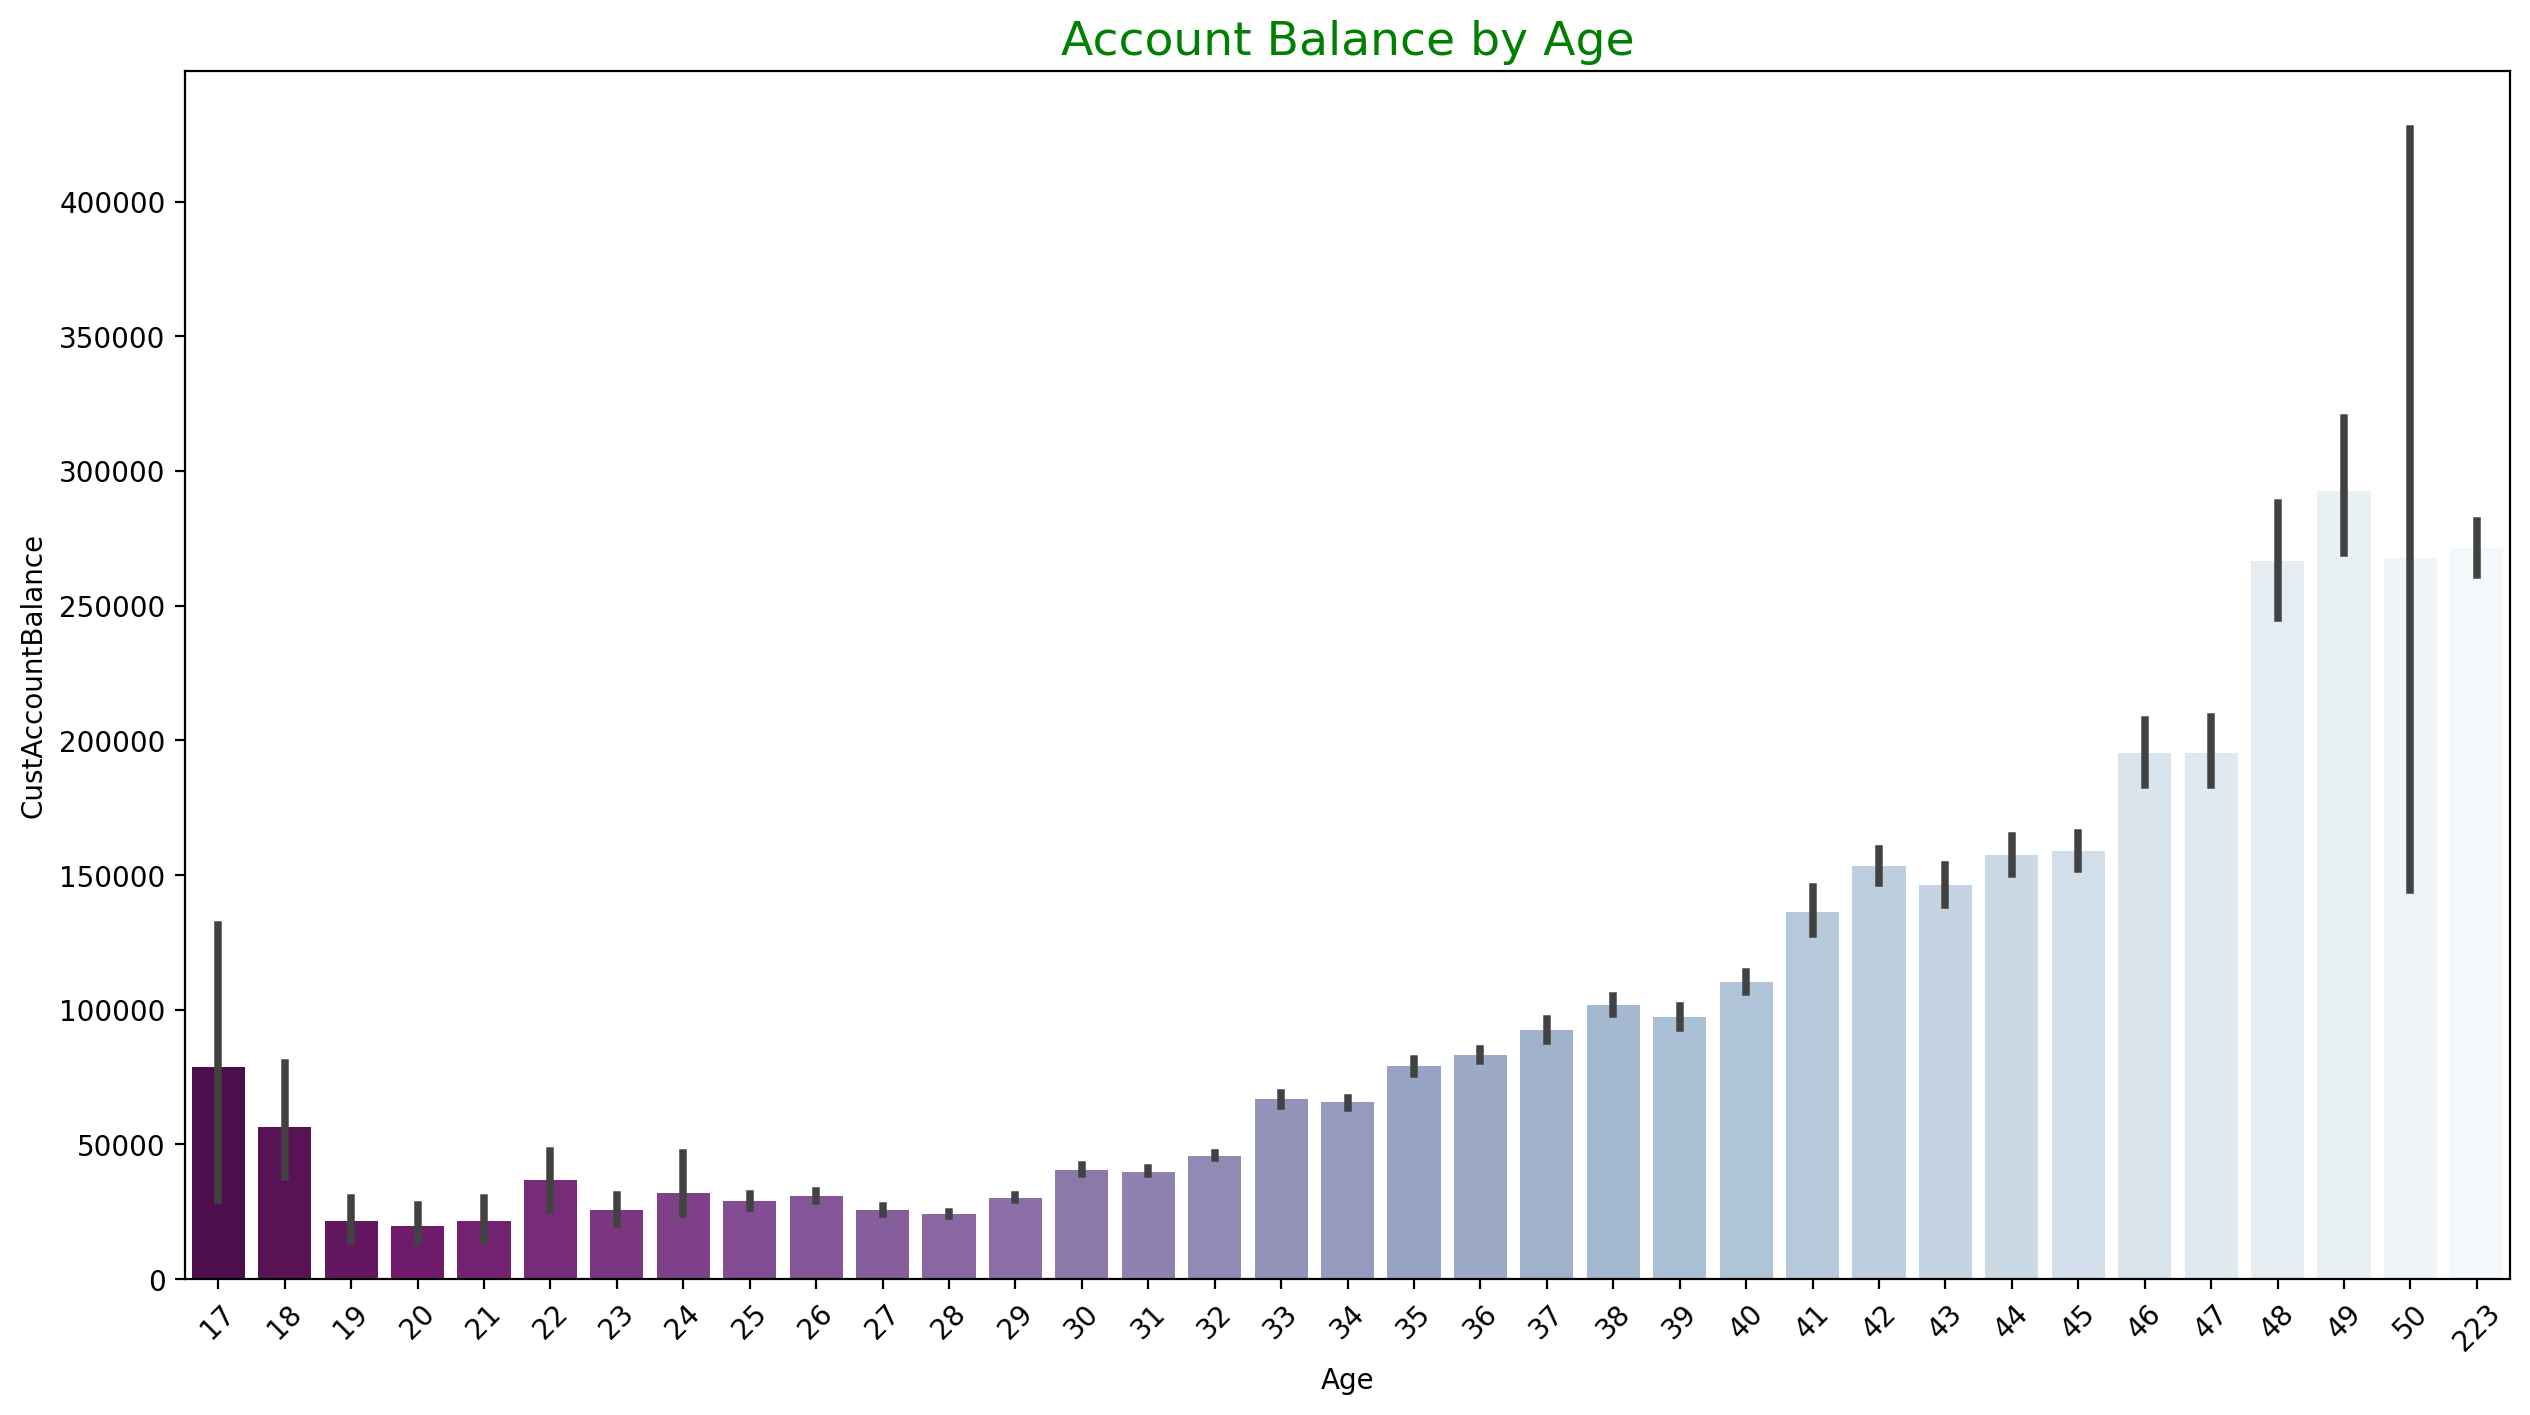

In [50]:
# Che
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=df,x='Age',y='CustAccountBalance',palette='BuPu_r')
plt.xticks(rotation=45)
plt.title("Account Balance by Age", fontsize=17, c='g')
plt.show()

### Observation
- Assuming that there is no age 222 which was assumed as a placeholder; we observe that;
    - Account balances of customers increases with Age and having a peak at 50 with few exceptions
    - 
    
    - 

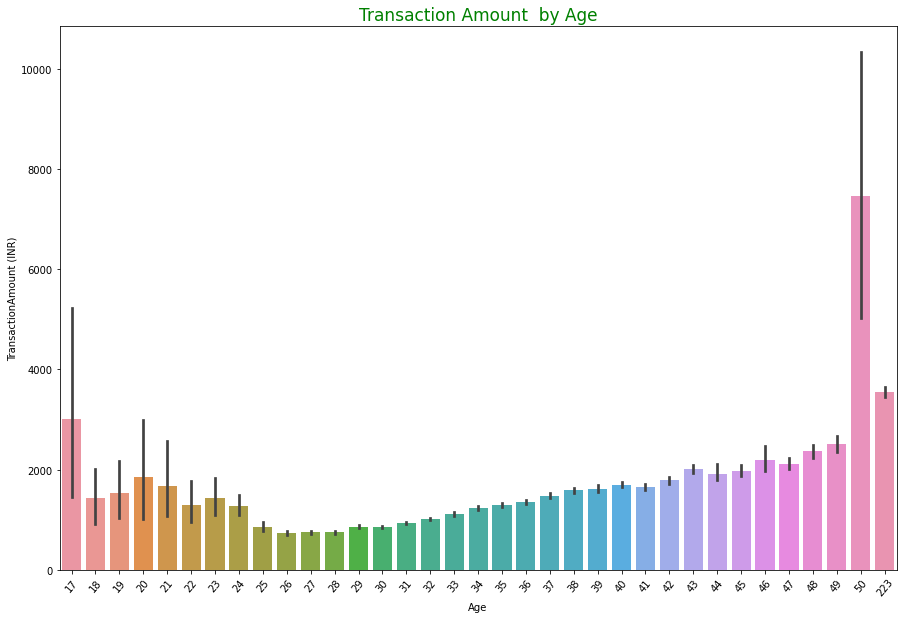

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Age',y='TransactionAmount (INR)')
plt.title("Transaction Amount  by Age", fontsize=17, c='g')
plt.xticks(rotation=50)
plt.show()

- There is a similar trend as the case of Account balance allthough for Younger adult customers, in the age range of 19 to 24 years, 
 perform exorbitant transactions as compared to their surrounding age groups. This  might be a reason due to the reason that younger adults between the ages of 18 to 24 years have their own career aspirations to fulfil as a  consequence of which they generally have lavish and extravagant demands for fulfilling their passions and interests and for facilitating their development through all means.
- As also from 29 the transaction amount increases which might be due to the individual has a family which he is looking after and managing his livelihood

### Check Distribution of numerical columns originally

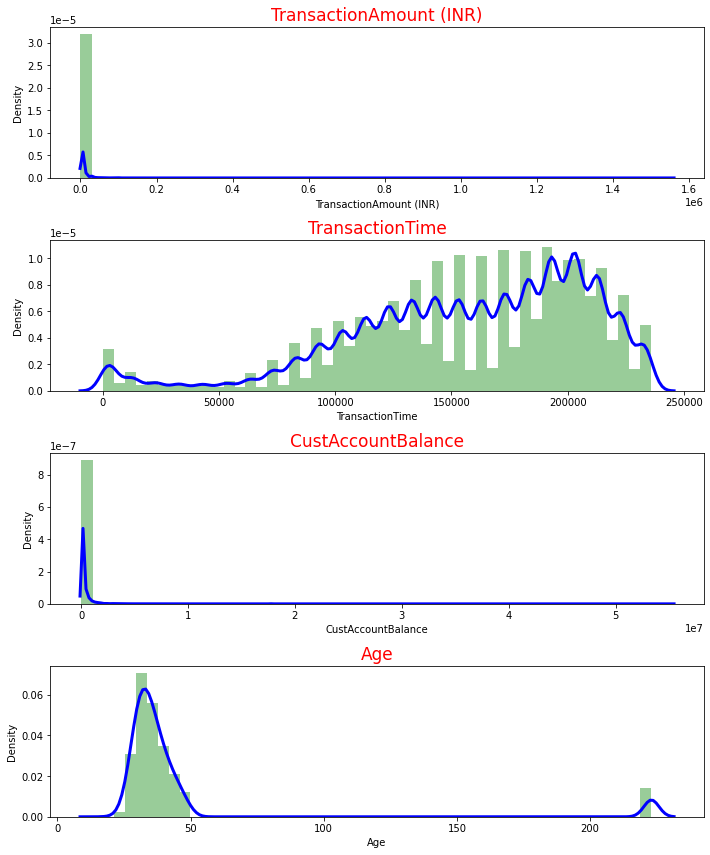

In [52]:
# lets plot KDE plot of numerical features to have some observations
plt.figure(figsize = (10,50))
numerical_cols = ['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance', "Age"]
for i in range(len(numerical_cols)):
    plt.subplot(17, 1,  i+1) 
    sns.distplot(df[numerical_cols[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws= {"color":"g"}) 
    
    plt.title(numerical_cols[i], fontsize=17, c='r')     
    
plt.tight_layout()

### Observation
- Age is normally distributed when imputed age with placeholder i.e one that DOB was 1800 is ignored.
- Transaction amount, Account balance and transaction time is not normally distributed.
- Balance and Transaction amount is skewed to the left highly while Transaction time is skewed to the right.
- These features will be normallized using A scaling version between the maximum and minimum value in order to make it std value small

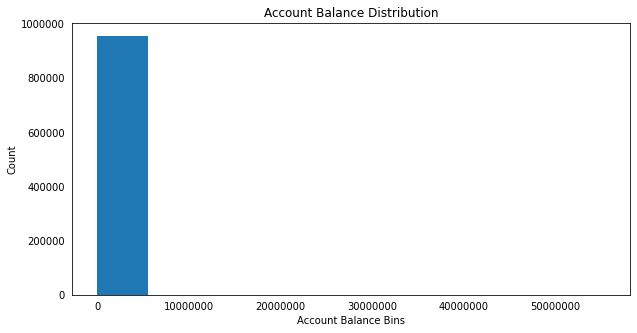

In [53]:
plt.figure(figsize=(10,5))
plt.title("Account Balance Distribution")
plt.xlabel("Account Balance Bins")
plt.ylabel("Count")
plt.hist(df.CustAccountBalance,bins=10)
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

### Results

- Account balances domainte in the region of 0 to 800000 Cr and above showing that the majority of population is Moderately rich customers.

In [54]:
df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'TransMonth', 'TransactionDay', 'TransWeekDay', 'TransYearDay',
       'TransYear', 'TransHour'],
      dtype='object')

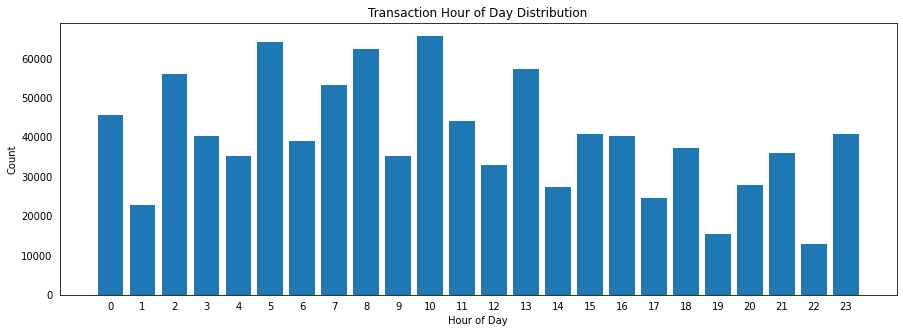

In [55]:
plt.figure(figsize=(15,5))
un, count = np.unique(df.TransHour.values.astype('int32'),return_counts=True)
un, count = zip(*sorted(zip(un, count)))
plt.title("Transaction Hour of Day Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
# sns.barplot(
#     [str(i) for i in un], count
# )
plt.bar([str(i) for i in un], count)
plt.show()

### Res
- More transaction are done at 0500hrs, 1000hrs and 13hrs. This is probable the time in which they are waking up, going for morning tea and lunch.

### feature engineering

- All columns not required will be removed.
- Columns that are not numerical will be converted to numerical for machine learning (Clustering purposes)
- Data will be scaling using MinMax scaler

In [56]:
df.head(2)

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,2,8,0,39,2016,15
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,2,8,0,39,2016,15


In [57]:
# Extract year of birth, month of birth and day from CustomerDOB
# Convert gender data F=0 and M=1
# Drop  CustomerDOB and TransactionDate columns for ml application

In [58]:
# extract year, month and day from date of birth
df['YearDOB'] = df['CustomerDOB'].dt.year
df['DayDOB']  = df['CustomerDOB'].dt.day
df['MonthDOB'] = df['CustomerDOB'].dt.month


In [59]:
# encode location since it has some information about customer
from sklearn.preprocessing import LabelEncoder
loc_encoder = LabelEncoder()
df['CustLocation'] = loc_encoder.fit_transform(df.CustLocation)

In [60]:
# drop the 3 columns

df.drop(columns=['CustomerDOB',"TransactionDate"], inplace=True)

# recheck the data
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour,YearDOB,DayDOB,MonthDOB
0,F,3357,17819.05,143207,25.0,28,2,8,0,39,2016,15,1994,1,10
2,F,4927,17874.44,142712,459.0,26,2,8,0,39,2016,15,1996,26,11
3,F,4927,866503.21,142714,2060.0,49,2,8,0,39,2016,15,1973,14,9
4,F,5291,6714.43,181156,1762.5,34,2,8,0,39,2016,2,1988,24,3
6,F,4927,973.46,173806,566.0,30,2,8,0,39,2016,0,1992,26,1


In [61]:
# convert gender values to numerical
df['CustGender'] = np.where(df.CustGender=="M", 1, 0)

In [62]:
# All records with age as placeholder is going to be removed since the analysis phase is done

df_final = df[df['Age']<=100]

In [63]:
# scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(df_final)

### The dataset is now ready for machine learning
- It will be reduced its dimension using PCA
- At first, contribution percentage of each component will be observed and components that has atleast 60% representation of the dataset selected

In [64]:
X.shape

(901140, 15)

In [65]:
X = pd.DataFrame(X)

In [66]:
#set seed for productivity of the project
SEED = 2022
def set_random_seed(SEED=SEED):
    import os
    np.random.seed = SEED
    os.environ['PYTHONHASHSEED'] = str(SEED)
    
set_random_seed()

In [67]:
# in order to work well , try reducing the dimension of the data points
# Apply PCA by fitting the data with the same number of dimensions as features


mms = MinMaxScaler()
mms.fit(df)
df1 = mms.transform(df)


n_components = df.shape[1]
pca = PCA(n_components=n_components, random_state=SEED)
pca.fit(df)

#transform the df using the PCA fit above
pca_df = pca.transform(df)


In [68]:
df.shape

(957431, 15)

- Checking the representation of each componet of the whole dataset
- Explained variance ration is going to be used to determine cumulative explained variance.

In [69]:
# get variance/data representability of each of the component
for i in range(n_components):
    first_n = pca.explained_variance_ratio_[0:i+1].sum()*100
    print(f'Percent variance explained by first {i+1} components: {round(first_n , 4)}%')

Percent variance explained by first 1 components: 98.8919%
Percent variance explained by first 2 components: 99.9831%
Percent variance explained by first 3 components: 99.998%
Percent variance explained by first 4 components: 100.0%
Percent variance explained by first 5 components: 100.0%
Percent variance explained by first 6 components: 100.0%
Percent variance explained by first 7 components: 100.0%
Percent variance explained by first 8 components: 100.0%
Percent variance explained by first 9 components: 100.0%
Percent variance explained by first 10 components: 100.0%
Percent variance explained by first 11 components: 100.0%
Percent variance explained by first 12 components: 100.0%
Percent variance explained by first 13 components: 100.0%
Percent variance explained by first 14 components: 100.0%
Percent variance explained by first 15 components: 100.0%


### Observation
- It can be seen that the majority of the variance in our data (>99%) can be encoded in 2 of our 15 dimensions. Thats over 99% of the variance  present can be encoded in 2 dimensions. This suggests that, There can be seen some underlying structure in a 2D visualization although some information of about 1% will be hidden.
- All the data can be encoded with only 3 dimension (3D) by 100% score

-  Also at 2D 99.98% of the information can be encoded , by being able to gather much information using the first 2 components
- So in this case, Only 2 Dimensions will be created by reducing it using PCA algorithm with 2 PCA components.
- Then compile the labels to to this compressed dataset after assigning labels to all of our records to visualize the results of our clustering efforts.

In [70]:
# reduccing the data to the 2 dimensions
mms = MinMaxScaler()
mms.fit(df)
df2 = mms.transform(df)

pca = PCA(n_components=2, random_state=SEED)
pca.fit(df2)

#transform wines_norm using the PCA fit above
traindf = pca.transform(df2)

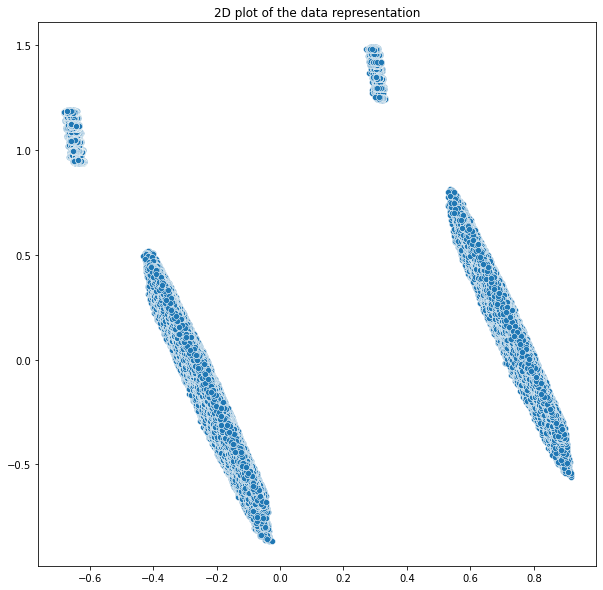

In [71]:
plt.figure(figsize=(10 ,10))
plt.title("2D plot of the data representation")
sns.scatterplot(traindf[: , 0] , traindf[: , 1])

### Observation
- As it can be seen from above, the data is divided into some groups when visualized in 2D.

- From the above plot there seems to be a distinguishable pattern for groups
- Some algorithms for clustering (In this case KMEANS will be used) will be used to perfom check for distinguishable pattern for groups/segments.
- An analytic method will be used to determine the best number of groups

##### This analytical will be done as follows:

- 1)  Fit the clustering algorithm using several different values of k where k is the number of clusters with  k range from 2 to 20.

- 2) For each value of k, Evaluate the clustering results using the average Sum of squared distance score. Then plot the results against each k value and identify which number of clusters leads to the best results. This method is called ELBOW CURVE method

- 3) Clusters will then be assigned to the required data point

\

### Determining the best k value

In [ ]:
# determine the best k value using kmeans

# model params
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
 # A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(traindf)
    sse.append(kmeans.inertia_)
    
# plot the elbow curve
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Observation
- From the curve above, It can be seen that the elbow curve forms in about the 3rd or 4th cluster.
- This 2 might be the best clusters for segmentation.
- For easier analysis, both 2 clusters are going to be used in the analysis.

In [ ]:
#step size of the mesh
#a point in mesh
h = 0.015 
# for plotting decision boundary . each will have its won color.
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
"""
Plotting Kmean++ and normal kmeans on clusters 3,4,5 and visuallization of the results
"""
for n_points in [3 ,4,5]:
    n_rows = 2
    n_cols = 1
    plt.figure(figsize=(30,25))
    plt.suptitle(f"Comparison of  Multiple KMEAN Clustering Algorithms with  {n_points} clusters",fontsize=40,color='r')

    selected_models = [       
        (KMeans(n_clusters=n_points), "KMeans"),
        (KMeans(n_clusters=n_points, init='k-means++'),"k-means++")
    ]

    for i, (select_model, description) in enumerate(selected_models):
        select_model.fit(traindf)
        y = select_model.predict(np.c_[xx.ravel(), yy.ravel()])
        y = y.reshape(xx.shape)
        #plot the cluster results
        plt.subplot(n_cols, n_rows, i + 1)
        plt.imshow(y, interpolation="nearest", 
                   extent=(xx.min(), xx.max(), 
                   yy.min(), yy.max()),
                   cmap=plt.cm.Paired, 
                   aspect="auto", origin="lower",
                  )
        plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.5)


        centroids = select_model.cluster_centers_
        # set centroids shape as a X        ; set centroids color as a white
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
        plt.title(description , fontsize=20 , color='g')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
    plt.show()

#### Observation
- Each algorithm and cluster points has different distingishable features
- Cluster 3 seems to be well separated in all algorithm followed by 4.
- For the purpose of segmenting the data, only the two will be used

In [ ]:
kmean3 = KMeans(n_clusters=3,init="k-means++")
kmean3.fit(traindf)
labels_3 = kmean3.labels_

# plot
plt.figure(figsize=(15 , 10))
sns.scatterplot(traindf[:, 0], traindf[:, 1] , c = labels_3 , label="n_cluster-"+str(len(set(labels_3))))
plt.title("Kmeans Clusters=3 algorithm" , fontsize =25)
plt.show()

- There is well distinguishable of features in this case although centroid of one of the clusters seems to not be good placed.

In [ ]:
kmean4 = KMeans(n_clusters=4,init="k-means++")
kmean4.fit(traindf)
labels_4 = kmean4.labels_

# plot
plt.figure(figsize=(15 , 10))
sns.scatterplot(traindf[:, 0], traindf[:, 1] , c = labels_4 , label="n_cluster-"+str(len(set(labels_4))))
plt.title("Kmeans Cluster=4   algorithm" , fontsize =25)
plt.show()

### Cluster 4 seems to be the best.
- Segmentation will focus on 4 clusters but 3 will also be included
- The clusters 3 and can split the data into distint clusters as seen above by the graphs.

In [ ]:
# check the data and add the labels for both cluster
df['cluster4'] = labels_4
df['cluster3'] = labels_3

In [ ]:
# check distribution for cluster 4
df.cluster4.value_counts(normalize=True)



In [ ]:
sns.countplot(df['cluster4'])
plt.title("Distribution of cluster 3 data", fontsize=19, c='r')

### Observation
- The 4 clusters are not normally distributed. Each cluster has the following percentage distribution
            0    35%
            3    32%
            1    26%
            2    5%
Cluster labelled 2 had the lowest datapoints of about 5%.

In [ ]:
df.cluster3.value_counts(normalize=True)

In [ ]:
# plot for clusters

sns.countplot(df['cluster3'])
plt.title("Distribution of cluster 3 data", fontsize=19, c='r')

### Observation
- The 3 clusters are not normally distributed as some labels have large amount of recordds. Each cluster has the following percentage distribution
            0    26%
            2    68%
            1    5%
            
           ~~ Much of the data is clustered at label 2 as it covers about 68% of the whole dataset

In [ ]:
df.head()

## Observing the characteristics of each Segment of clustered data.
- The major focus will be the TransactionTime, Age, AmountTransacted and CustomerBalance

In [ ]:
df[['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour", "cluster3", "cluster4"]]

In [ ]:
# query required data
required_df = df[
    ['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour", "cluster3", "cluster4","CustGender"]
]

In [ ]:
required_df.shape

In [ ]:
# columns to use
query_cols = ['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour"]

required_df.groupby('cluster3')[query_cols].mean().style.background_gradient(cmap='rainbow_r')

### 3-segments Observation

- There is a clear distinction between cluster labelled 1 and the rest.
- Interms of transactions Hour, both almost take similar time on averagely.
- The values for Account Balance, Transaction Time and Transaction Amount is way hihger than those labeled 0 and 2. - -- This is the group that had their age put as placeholed i.e their ages is 222years

- There is not march big difference between cluster labelled 0 and 2

In [ ]:
tbl1 = required_df.groupby("cluster4").mean()[query_cols]
tbl1.style.background_gradient(cmap='Reds')

### Observation 
- A similar trend is observed. It can be seen that The clusters cannot be segmented by their age on hour in which they did their transaction.
- Clusters labelled 0, 3, and 4 and closely related while cluster labelled 2 has the most distint among them.

In [ ]:
required_df.groupby(['CustGender', "cluster3"]).mean()[query_cols].style.background_gradient(cmap='cividis')

### Observation
- There is no Cluster 0 in Males.
- MAjority of males males up cluster 1 and 3.
- Cluster labelled 0 has only few females.
- Clusters 0 and 2 had lowests amount of Transaction and Account Balance while cluster 1 had the highest.
- This suggests that both female and males in cluster 1 were heavy investors and transacters.




*   List item
*   List item



In [ ]:
required_df.groupby(['CustGender', "cluster4"]).mean()[query_cols].style.background_gradient(cmap='magma')

### Observation
 - A similar trend is observed as above where clusteds 0, 1 and 3 have small values of account balances while clusters 2 had large sum of account balances and transaction amounts.
 - Cluster 1 only has Females while cluster 0 only has Males.

### Final Conclusion

- The Average age of customers does not affect how transaction is made as the segmented groups have almost simlar age on average.
- The `CLuster LAbelled 2` on the 3 cluster analysis should be considered suitably for better banking products. Majority of customers in this segment are the one whose DOB is not provided as it can be seen from the segmentation. More products on them will mean they can be encouraged to store more money and transact more.

- `Cluster Labelled 0 and 1` is characterised by lower amount of transactions. The bank should alos try to get feedback from people on those groups in order to identify how their services can be improved. The group might be being affected by services offered and taking feedback from them might help the bank come up with a better strategy to improve their transactions and amount they store in the bank.


- This cluster analysis  has helped us revealed specific characteristics and insights that will help the bank to understand their customers need and requirement so that the bank can create customized offers and custom plans to attract potential and profitable customers sell their products and services to those holding few products that will lead to higher product penetration, higher stickiness, and lower base erosion. This will empower banks to nurture by targeting specific segments with suitable products and services, thus providing a more personalized approach that might lead the bank with appropriate marketing propositions, growth, and profitability.

---
THE END

---